# IMPORT LIBRARIES AND DATASETS

In [13]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [3]:
# You have to include the full link to the csv file containing your dataset
diabetes = pd.read_csv('data/diabetes.csv')

In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# DATA VISUALIZATION

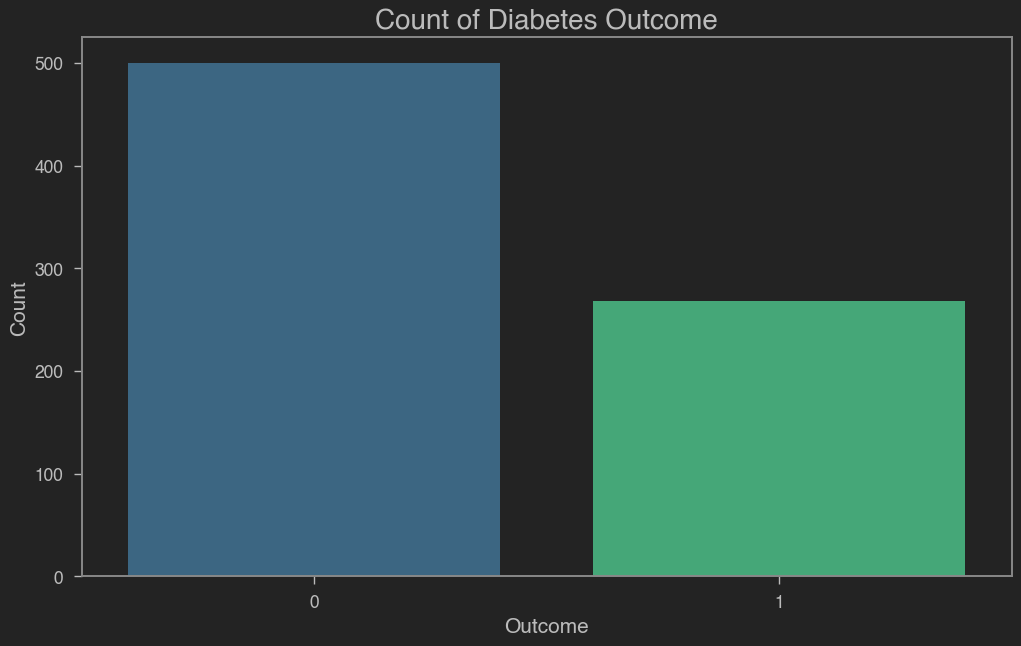

In [9]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Outcome', hue = 'Outcome', data = diabetes, palette='viridis', legend=False) 
plt.title('Count of Diabetes Outcome', fontsize=20)
plt.xlabel('Outcome', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

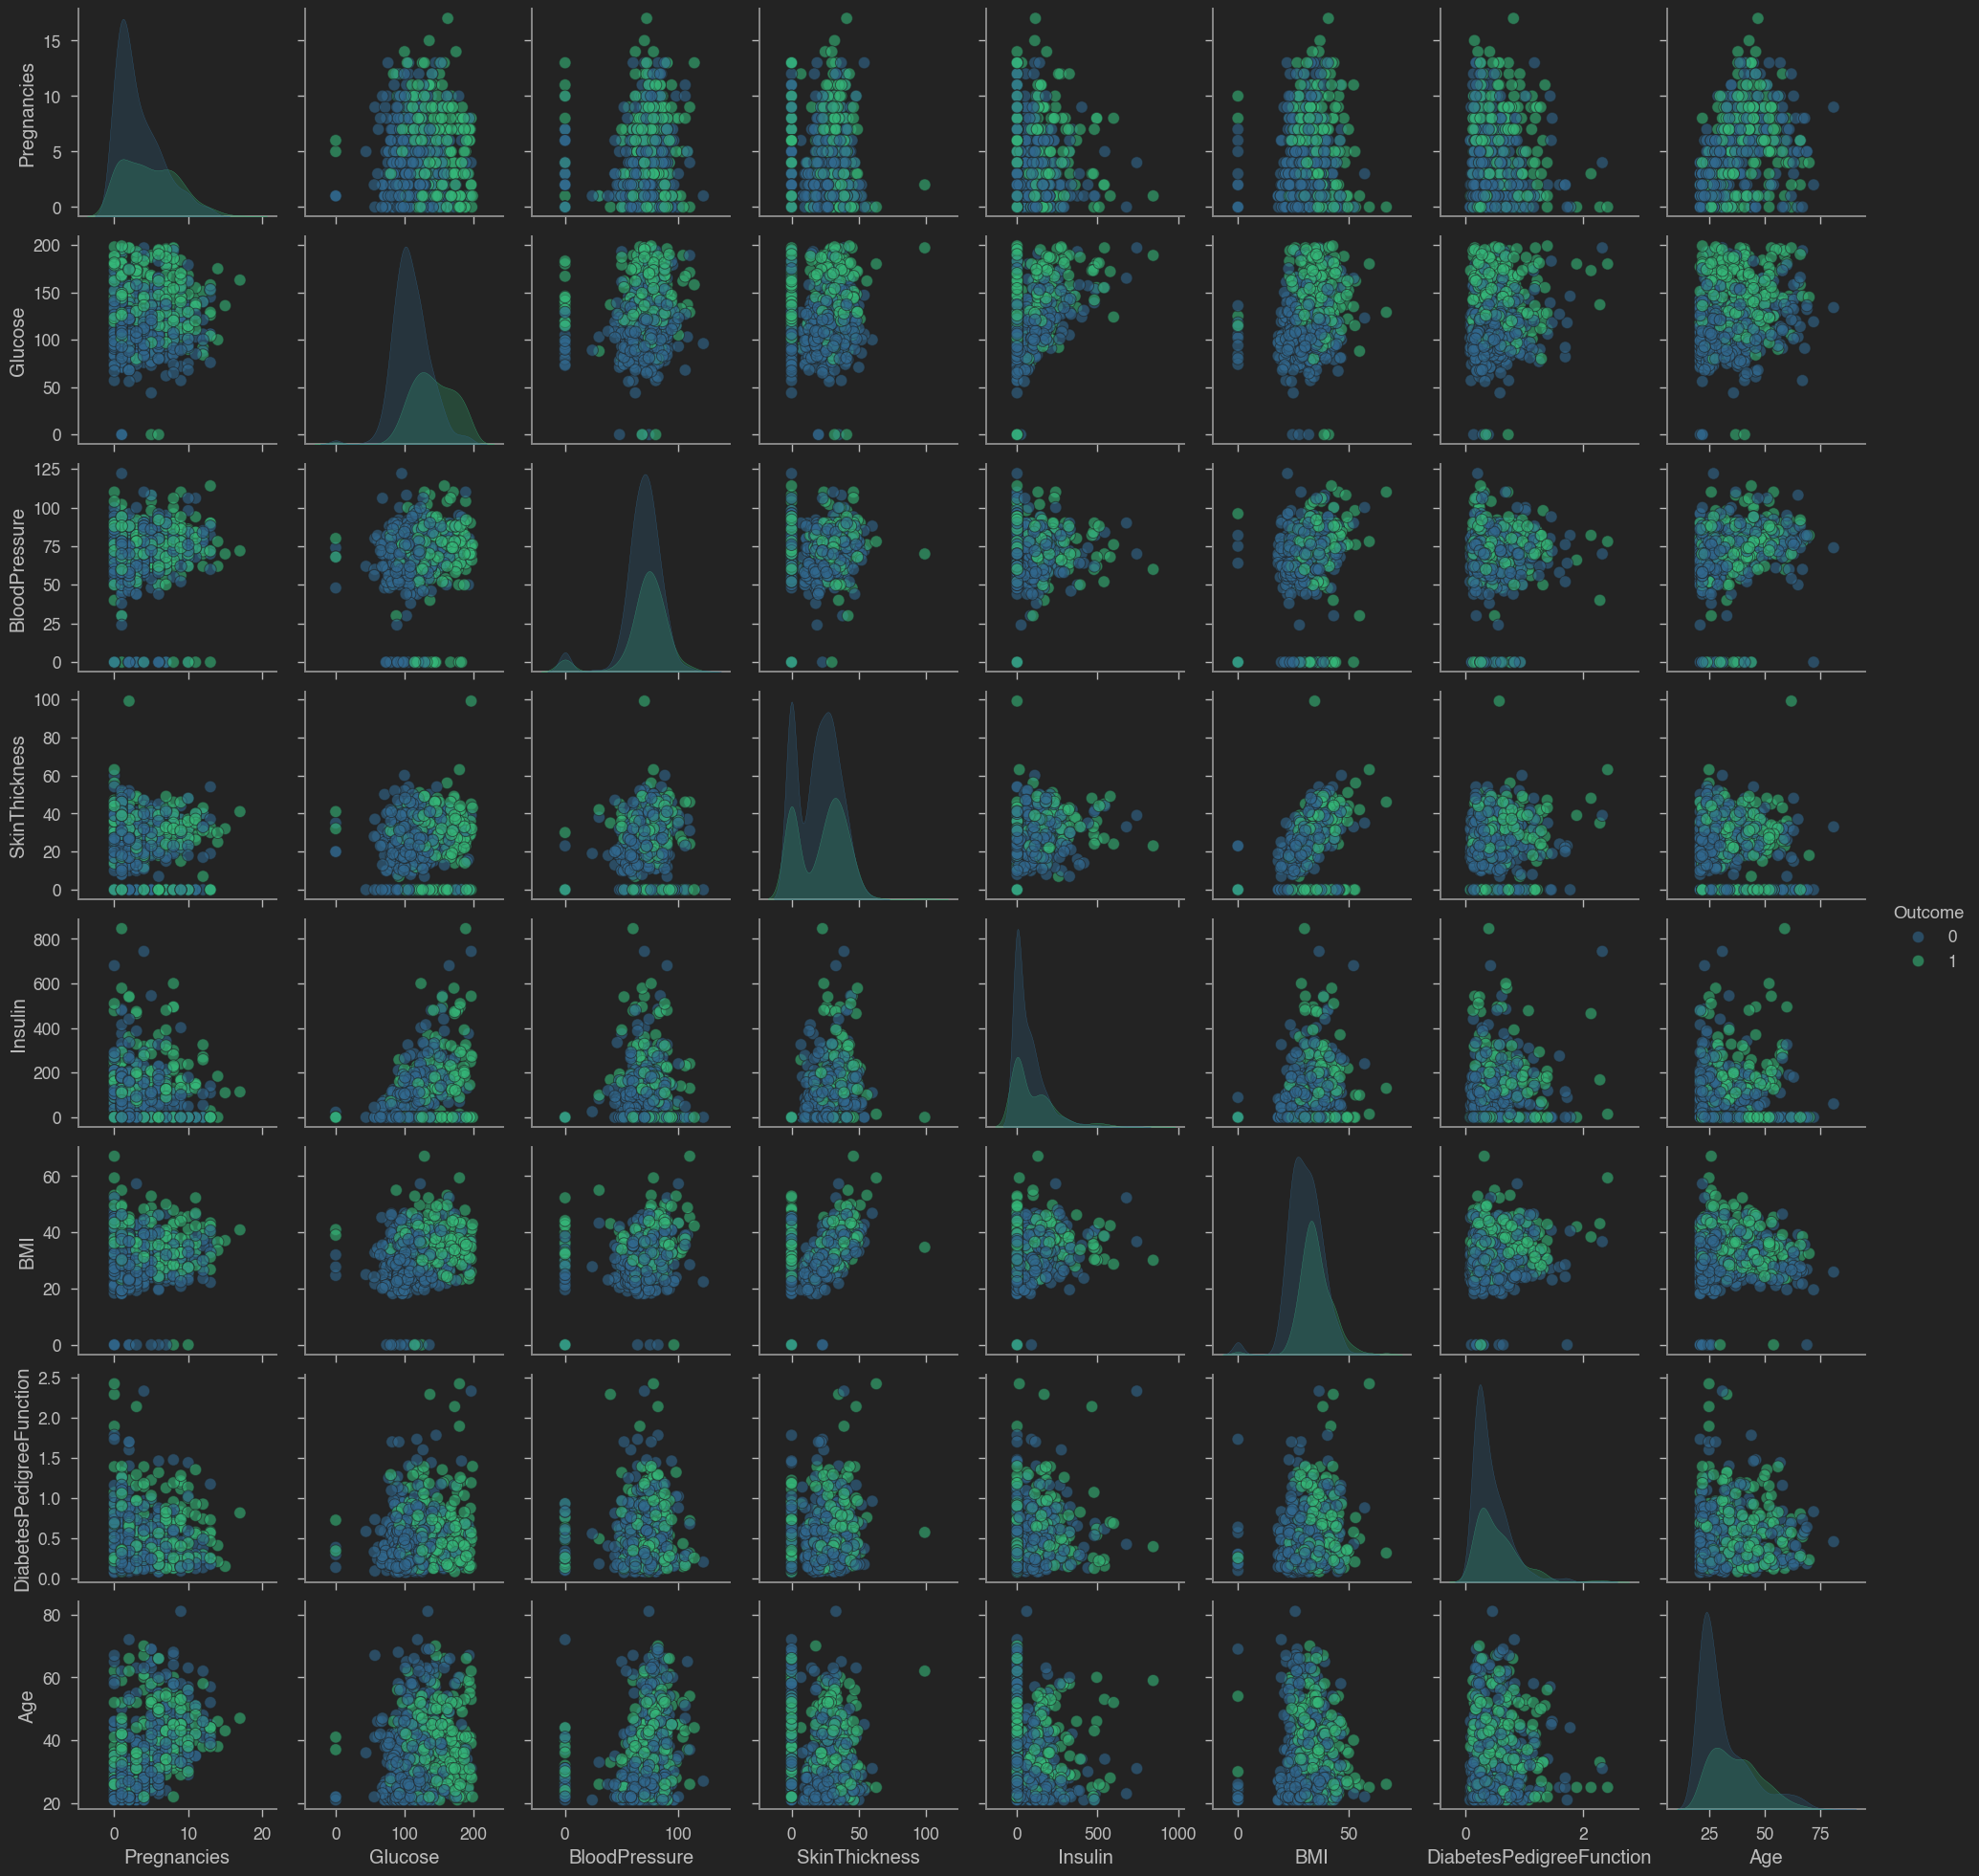

In [10]:
sns.pairplot(diabetes, hue = 'Outcome', 
             vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
             palette='viridis', plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})


<Axes: >

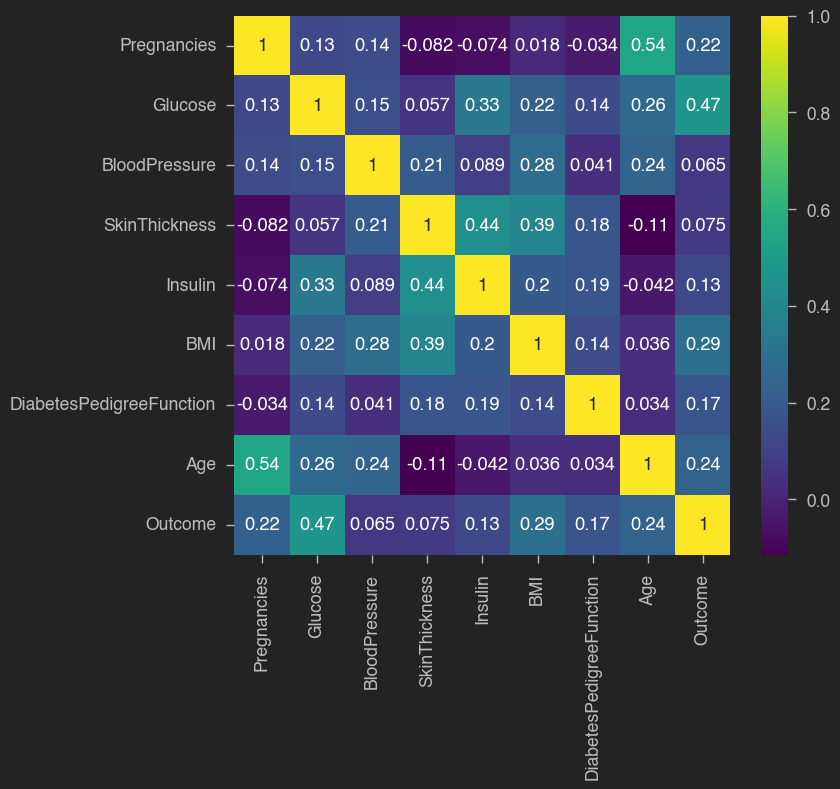

In [11]:
corr = diabetes.corr()
sns.heatmap(corr, annot=True, cmap='viridis')


# Feature Importance

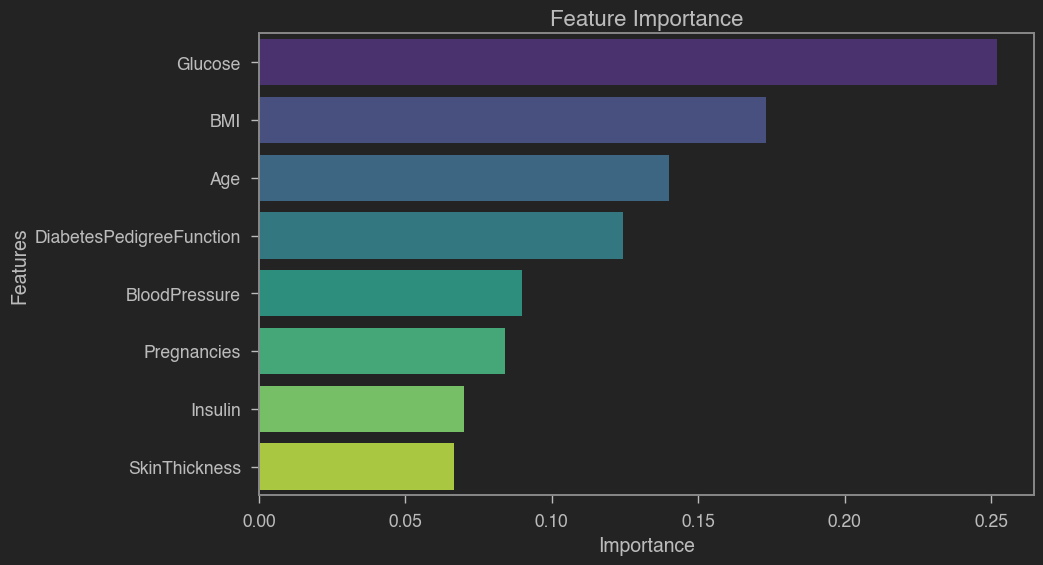

In [17]:
import matplotlib.pyplot as plt

# Fit the model and get the feature importances
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

model = RandomForestClassifier()
model.fit(X, y)

importance = pd.DataFrame({'features': X.columns, 'importance': model.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='features', hue='features', data=importance, palette='viridis', legend=False)

# Add labels and title
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance', fontsize=16)

# Show the plot
plt.show()


In [18]:
from scipy.stats import ttest_ind, mannwhitneyu

# List of features
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Separate the dataset into two groups based on the 'Outcome'
group1 = diabetes[diabetes['Outcome'] == 0]
group2 = diabetes[diabetes['Outcome'] == 1]

# Perform t-tests and Mann-Whitney tests
for feature in features:
    t_stat, t_p_val = ttest_ind(group1[feature], group2[feature])
    mw_stat, mw_p_val = mannwhitneyu(group1[feature], group2[feature])
    
    print(f"Feature: {feature}")
    print(f"T-test p-value: {t_p_val}")
    print(f"Mann-Whitney test p-value: {mw_p_val}")
    print("-----------------------------")


Feature: Pregnancies
T-test p-value: 5.065127298053476e-10
Mann-Whitney test p-value: 3.745146414110847e-08
-----------------------------
Feature: Glucose
T-test p-value: 8.935431645289913e-43
Mann-Whitney test p-value: 1.2007268419877137e-39
-----------------------------
Feature: BloodPressure
T-test p-value: 0.0715139000977608
Mann-Whitney test p-value: 7.5585124602395e-05
-----------------------------
Feature: SkinThickness
T-test p-value: 0.03834770482049123
Mann-Whitney test p-value: 0.012961829559891893
-----------------------------
Feature: Insulin
T-test p-value: 0.00028618646036031987
Mann-Whitney test p-value: 0.06566036997824368
-----------------------------
Feature: BMI
T-test p-value: 1.2298074873116022e-16
Mann-Whitney test p-value: 9.73078977612743e-18
-----------------------------
Feature: DiabetesPedigreeFunction
T-test p-value: 1.254607010148809e-06
Mann-Whitney test p-value: 1.1965834413919491e-06
-----------------------------
Feature: Age
T-test p-value: 2.209975460

### conclusion

In summary, all features except BloodPressure (according to the t-test) and Insulin (according to the Mann-Whitney test) differ significantly between the two result groups. It indicates that these features could be important when determining the outcome. 

# SPLIT THE DATA AND PREPARE IT FOR TRAINING

In [19]:
X = diabetes.drop('Outcome', axis=1).values

In [20]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [21]:
y = diabetes.loc[:, 'Outcome'].values


In [22]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [23]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

In [24]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [25]:
from sklearn.model_selection import train_test_split

# Define the proportion of the dataset to include in the test split
test_size_proportion = 0.2

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_proportion)


In [26]:
X_train.shape

(614, 8)

In [27]:
X_test.shape

(154, 8)

# BUILD A NEURAL NETWORK MODEL USING KERAS

In [30]:
# Import the tensorflow library
import tensorflow as tf

# Create a Sequential model
ANN_model = tf.keras.models.Sequential()

# Add the first hidden layer with 400 units, 'relu' activation function and input shape of 8
ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))

# Add a dropout layer to prevent overfitting
ANN_model.add(tf.keras.layers.Dropout(0.2))

# Add the second hidden layer with 400 units and 'relu' activation function
ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu'))

# Add another dropout layer
ANN_model.add(tf.keras.layers.Dropout(0.2))

# Add the third hidden layer with 200 units and 'relu' activation function
ANN_model.add(tf.keras.layers.Dense(units=200, activation='relu'))

# Add another dropout layer
ANN_model.add(tf.keras.layers.Dropout(0.2))

# Add the output layer with 1 unit and 'sigmoid' activation function
ANN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [31]:
ANN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 400)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 400)            │       160,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │        80,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,401 (954.69 KB)

 Trainable params: 244,401 (954.69 KB)

 Non-trainable params: 0 (0.00 B)

## COMPILE AND TRAIN THE ANN MODEL

In [32]:
# Compile the ANN model
ANN_model.compile(optimizer='Adam', 
                  loss='binary_crossentropy', 
                  metrics = ['accuracy'])


In [33]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5624 - loss: 4.3972  
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5233 - loss: 1.7586 
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5720 - loss: 1.0869 
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6173 - loss: 0.8693 
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6476 - loss: 0.8453 
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6457 - loss: 0.7995 
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5520 - loss: 0.8177 
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6070 - loss: 0.7078 
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6304 - loss: 0.6871 
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6354 - loss: 0.6637 
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - loss: 0.6777 
Epoch 12/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [35]:
y_pred = ANN_model.predict(X_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [36]:
y_pred

array([[6.19695008e-01],
       [4.61068600e-01],
       [8.95623386e-01],
       [6.45074069e-01],
       [3.62957984e-01],
       [4.99417901e-01],
       [2.34961212e-01],
       [3.97573322e-01],
       [3.76252532e-01],
       [7.36748695e-01],
       [2.91293651e-01],
       [1.68214753e-01],
       [8.97727787e-01],
       [1.29790634e-01],
       [8.79490376e-01],
       [6.50054753e-01],
       [5.97554088e-01],
       [3.92940015e-01],
       [4.00638908e-01],
       [6.09384298e-01],
       [7.76037335e-01],
       [6.41414762e-01],
       [4.82900739e-01],
       [3.84681225e-02],
       [1.54326990e-01],
       [9.53554571e-01],
       [5.97966254e-01],
       [6.28806770e-01],
       [8.44788313e-01],
       [2.30384842e-01],
       [2.70927668e-01],
       [2.39271477e-01],
       [2.84048855e-01],
       [4.82866377e-01],
       [5.87287784e-01],
       [6.98406994e-01],
       [4.74115978e-07],
       [4.39789772e-01],
       [5.01735032e-01],
       [7.33725965e-01],


In [37]:
y_pred = (y_pred > 0.5)

In [38]:
y_pred

array([[ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [

# EVALUATE MODEL PERFORMANCE 

In [39]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss'])

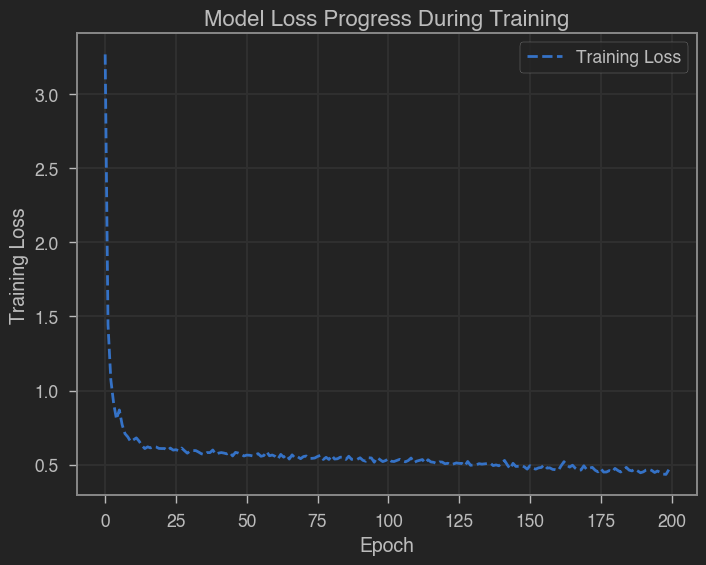

In [40]:
# Import the necessary library
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(8, 6))

# Plot the training loss
plt.plot(epochs_hist.history['loss'], 'b', linestyle='--', linewidth=2)

# Add a title and labels
plt.title('Model Loss Progress During Training', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Training Loss', fontsize=14)

# Add a legend
plt.legend(['Training Loss'], loc='upper right')

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


<Axes: >

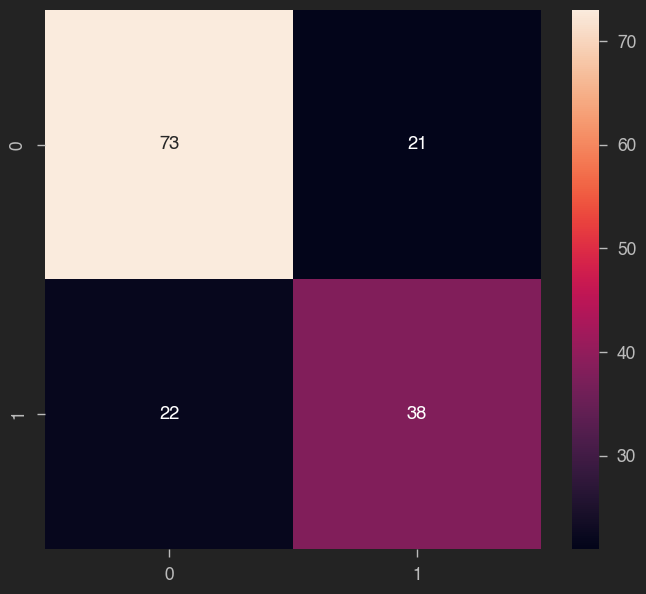

In [41]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        94
           1       0.64      0.63      0.64        60

    accuracy                           0.72       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.72      0.72      0.72       154



# TRAIN AND EVALUATE AN XG-BOOST ALGORITHM

In [43]:
# Train an XGBoost classifier model 

import xgboost as xgb
XGB_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
result_train = XGB_model.score(X_train, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.8517915309446255


In [45]:
# predict the score of the trained model using the testing dataset

result_test = XGB_model.score(X_test, y_test)
print("Accuracy : {}".format(result_test))

Accuracy : 0.7662337662337663


In [46]:
# make predictions on the test data
y_predict = XGB_model.predict(X_test)


In [47]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        94
           1       0.83      0.50      0.62        60

    accuracy                           0.77       154
   macro avg       0.79      0.72      0.73       154
weighted avg       0.78      0.77      0.75       154



Text(0.5, 36.38888888888887, 'Actual class')

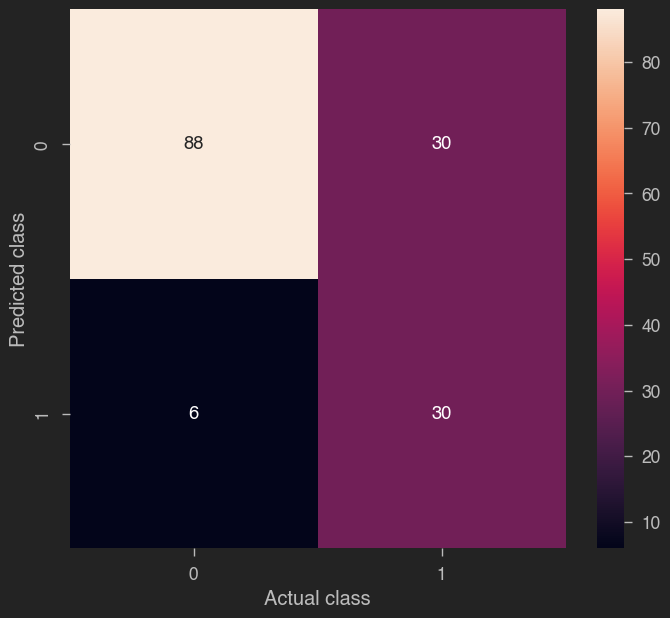

In [48]:
cm = confusion_matrix(y_predict, y_test) 
sns.heatmap(cm, annot = True)
plt.ylabel('Predicted class')
plt.xlabel('Actual class')

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [50]:
print(X_train.shape)
print(X_test.shape)

(576, 8)
(192, 8)
